# How to extract data from NWB

This notebook will demonstrate opening nwb files, exploring them, and extracting data that is important to our lab.

### Import modules

In [1]:
from pynwb import NWBHDF5IO
from nwbwidgets import nwb2widget
import ndx_pose
import numpy as np
import matplotlib.pyplot as plt

### Define nwbfile path and open it in read mode
Change the nwb_file path to reflect where it is stored on your computer

In [2]:
# Change the filepath here to where the file is located
nwb_file = '/project/nicho/data/marmosets/electrophys_data_for_processing/TY20210211_freeAndMoths/TY20210211_freeAndMoths-003_forAshvin.nwb'

io = NWBHDF5IO(nwb_file, mode='r')
nwb = io.read()

### Use nwb2widget to explore the data
Kinematic data is in processing --> goal_directed_kinematics --> find correct event --> hand

In [3]:
nwb2widget(nwb)

### Retrieve and visualize kinematics and timestamps of specific video events

##### access the video event data interfaces

In [10]:
event_pair = [145, 146]
first_key  = 'moths_s_1_e_%s_position' % str(event_pair[0]).zfill(3)
second_key = 'moths_s_1_e_%s_position' % str(event_pair[1]).zfill(3)

# get event data using container and ndx_pose names from segment_info table following form below:
# nwb.processing['goal_directed_kinematics'].data_interfaces['moths_s_1_e_004_position']
first_event_data = nwb.processing['goal_directed_kinematics'].data_interfaces[first_key] 
second_event_data = nwb.processing['goal_directed_kinematics'].data_interfaces[second_key] 
print(first_event_data)

moths_s_1_e_145_position ndx_pose.pose.PoseEstimation at 0x139888979431680
Fields:
  description: 3D positions of all markers using DLC+Anipose, with post-Anipose cleanup
  dimensions: <HDF5 dataset "dimensions": shape (2, 2), type "<u2">
  labeled_videos: <StrDataset for HDF5 dataset "labeled_videos": shape (2,), type "|O">
  nodes: <StrDataset for HDF5 dataset "nodes": shape (9,), type "|O">
  original_videos: <StrDataset for HDF5 dataset "original_videos": shape (2,), type "|O">
  pose_estimation_series: {
    elbow <class 'ndx_pose.pose.PoseEstimationSeries'>,
    hand <class 'ndx_pose.pose.PoseEstimationSeries'>,
    head_cutout_left_corner <class 'ndx_pose.pose.PoseEstimationSeries'>,
    head_front <class 'ndx_pose.pose.PoseEstimationSeries'>,
    head_under_tab <class 'ndx_pose.pose.PoseEstimationSeries'>,
    origin <class 'ndx_pose.pose.PoseEstimationSeries'>,
    shoulder <class 'ndx_pose.pose.PoseEstimationSeries'>,
    x <class 'ndx_pose.pose.PoseEstimationSeries'>,
    y 

##### Get hand kinematics and timestamps for the events

In [11]:
first_event_hand_kinematics = first_event_data.pose_estimation_series['hand'].data[:] 
first_event_timestamps = first_event_data.pose_estimation_series['hand'].timestamps[:]

second_event_hand_kinematics = second_event_data.pose_estimation_series['hand'].data[:] 
second_event_timestamps = second_event_data.pose_estimation_series['hand'].timestamps[:]

##### Plot the kinematic data
The solid lines are x/y/z (in blue/orange/green) for the first event. The second event uses same colors with dotted line. The gap is what you are trying to fill in.

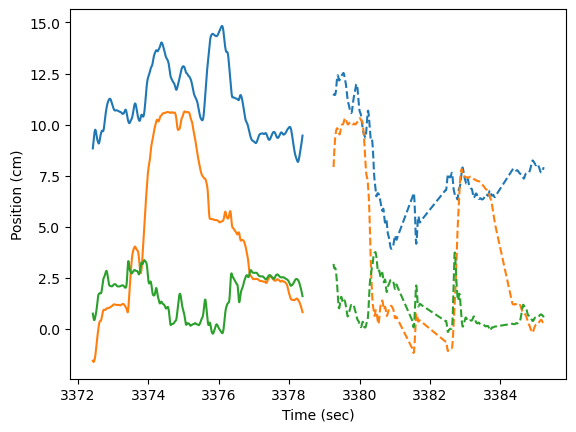

In [12]:
fig, ax = plt.subplots()

ax.plot(first_event_timestamps, first_event_hand_kinematics[:, 0], linestyle='-', color='tab:blue')
ax.plot(first_event_timestamps, first_event_hand_kinematics[:, 1], linestyle='-', color='tab:orange')
ax.plot(first_event_timestamps, first_event_hand_kinematics[:, 2], linestyle='-', color='tab:green')

ax.plot(second_event_timestamps, second_event_hand_kinematics[:, 0], linestyle='--', color='tab:blue')
ax.plot(second_event_timestamps, second_event_hand_kinematics[:, 1], linestyle='--', color='tab:orange')
ax.plot(second_event_timestamps, second_event_hand_kinematics[:, 2], linestyle='--', color='tab:green')

ax.set_ylabel('Position (cm)')
ax.set_xlabel('Time (sec)')

plt.show()

### This is where you come in! 
What you want to do is fill the gap shown in the plot above. This will involve computing an interpolation between the first event and second event kinematics, using the timestamps to define how long the gap is. Good luck!

In [13]:
# Fill in 
# your code
# here!

# np.linspace is a good tool for simple linear interpolations (np is abbreviated numpy)

### When you are done, make sure to close the file stream below

In [15]:
io.close()